In [1]:
from ocpmodels.preprocessing import AtomsToGraphs
import ase.io
from ase.build import bulk
from ase.build import fcc100, add_adsorbate, molecule, fcc111
from ase.constraints import FixAtoms
from ase.calculators.emt import EMT
from ase.optimize import BFGS
from ase.visualize.plot import plot_atoms
from ase.visualize import view
import sys
import numpy as np
import matplotlib.pyplot as plt

/home/zwbai/miniconda3/envs/ocp-models/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adslab = fcc111("Cu", size=(3, 3, 3))
ads = molecule("O2",positions=[(0, 0, 0), (0, 1.2, 1)])
add_adsorbate(adslab, ads, 3, position=(0,0) ,offset=(0, 0)) 

# 这里的tags与ase创建的构型的tags属性不同，ase创建的构型变量，tags属性与构型的分层相关
# tag all slab atoms below surface as 0, surface as 1, adsorbate as 2
tags = np.zeros(len(adslab))
tags[18:27] = 1 # 被吸附基底的表面层
tags[27:] = 2  # 11个原子，刚好是吸附分子

adslab.set_tags(tags) # 将tags属性替换

# Fixed atoms are prevented from moving during a structure relaxation. We fix all slab atoms beneath the surface
cons= FixAtoms(indices=[atom.index for atom in adslab if (atom.tag == 0)])
adslab.set_constraint(cons)
adslab.center(vacuum=2.0, axis=2)
adslab.set_pbc(True)
adslab.set_calculator(EMT())

print(adslab.cell)

Cell([[7.65796644025031, 0.0, 0.0], [3.828983220125155, 6.6319934785854535, 0.0], [0.0, 0.0, 12.168468943549097]])


In [3]:
cell = adslab.cell.cellpar()
print("Cell:", cell)


Cell: [ 7.65796644  7.65796644 12.16846894 90.         90.         60.        ]


visualization of the adsorbed slab

Cell([[7.65796644025031, 0.0, 0.0], [3.828983220125155, 6.6319934785854535, 0.0], [0.0, 0.0, 12.168468943549097]])


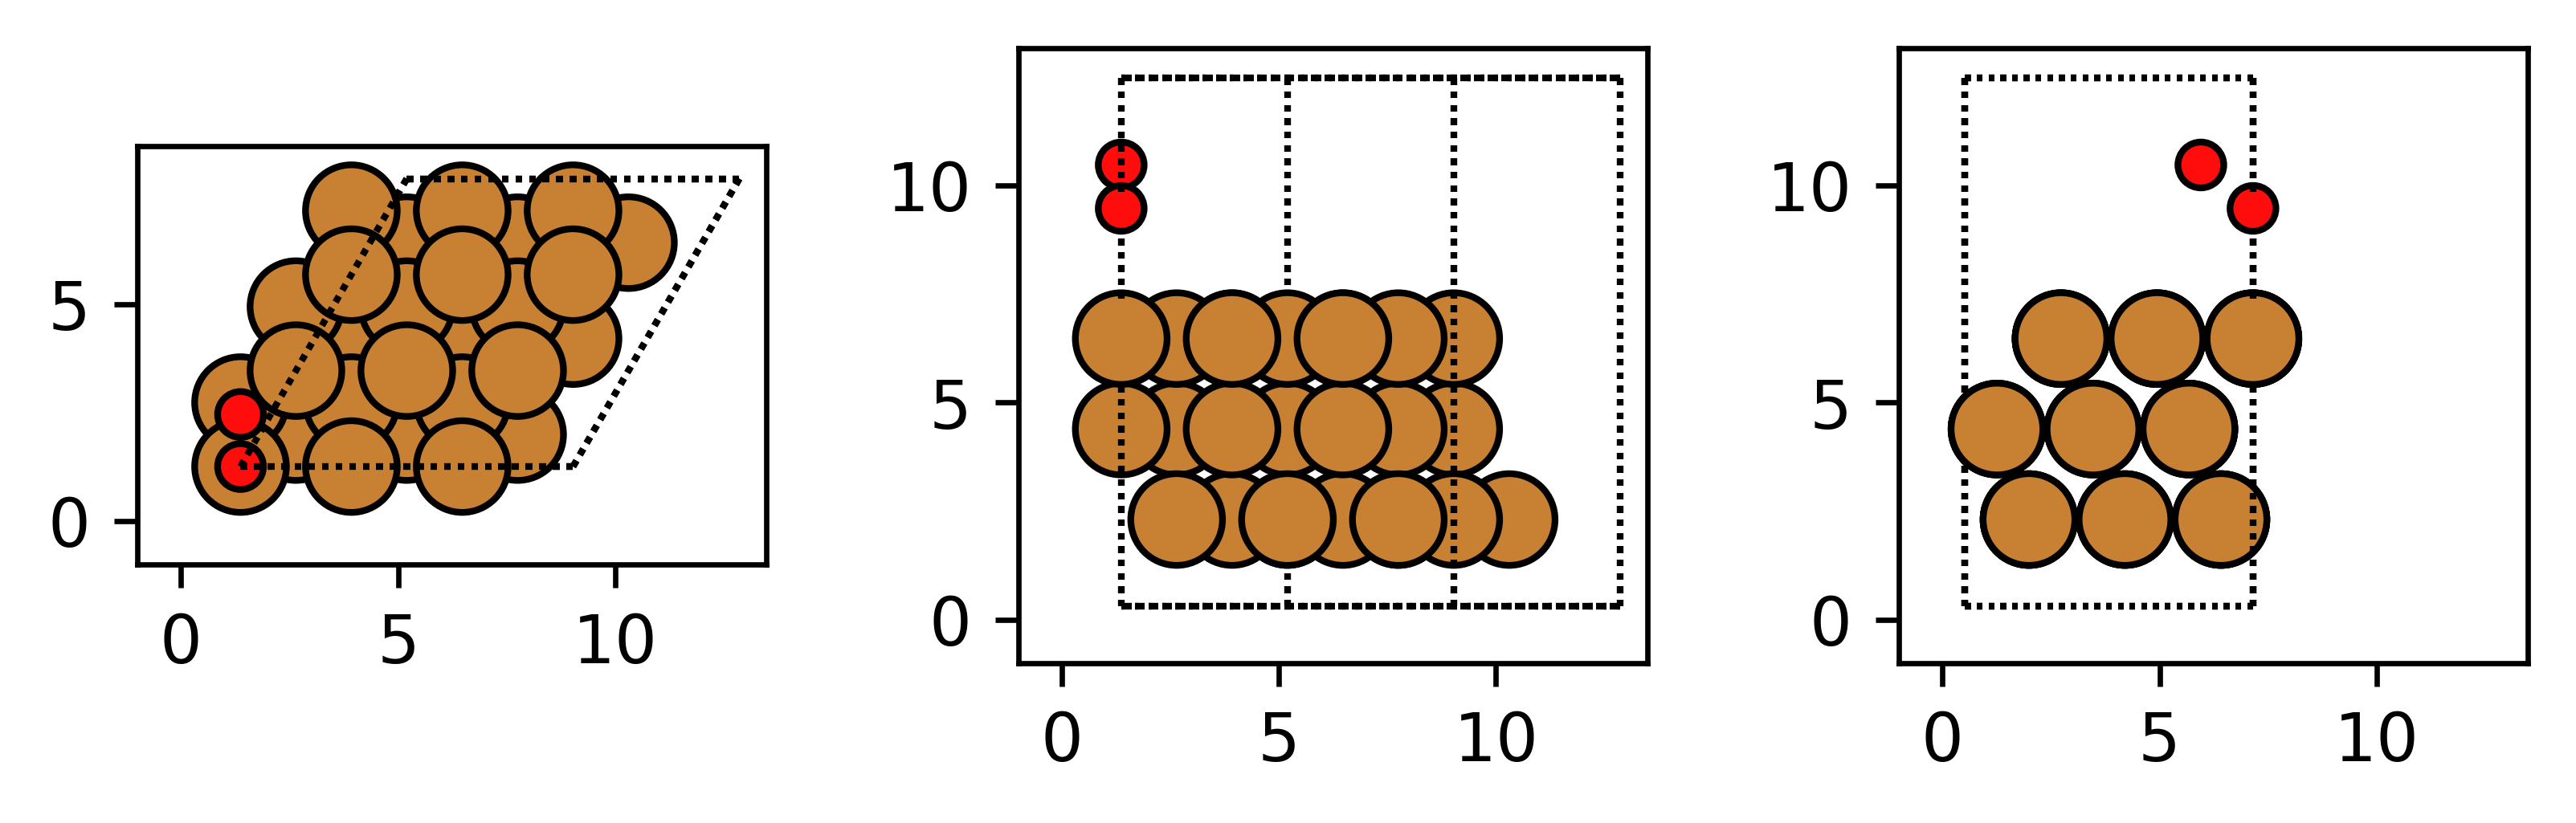

successful


In [4]:
fig, axs = plt.subplots(1, 3, dpi=600)
fig.subplots_adjust(wspace=0.4, hspace=0)

# 绘制第一个子图（俯视图）
print(adslab.cell)
axs[0].set_aspect('equal')
plot_atoms(adslab, axs[0], radii=0.8, rotation=('0x,0y,0z')) # the "rotation" value is the  rotation angle of the axis
axs[0].set_xlim(-1, adslab.cell[0,0]+adslab.cell[1,0]+2)
axs[0].set_ylim(-1, adslab.cell[1,1]+2)
# axs[0].quiver(0.8, 0, 0.2, 0, color='r')

# 绘制第二个子图（侧视图）
axs[1].set_aspect('equal')
plot_atoms(adslab, axs[1], radii=0.8, rotation=('-90x,0y,0z'))
axs[1].set_xlim(-1, adslab.cell[0,0]+adslab.cell[1,0]+2)
axs[1].set_ylim(-1, adslab.cell[2,2]+1)

# 绘制第个子图（侧视图）
axs[2].set_aspect('equal')
plot_atoms(adslab, axs[2], radii=0.8, rotation=('-90x,90y,0z'))
axs[2].set_xlim(-1, adslab.cell[0,0]+adslab.cell[1,0]+2)
axs[2].set_ylim(-1, adslab.cell[2,2]+1)
plt.show()
print('successful')

In [83]:
print(adslab.positions)
# 获取标记
tags = adslab.get_tags()
print(tags)


[[ 1.27632774  0.73688816  2.        ]
 [ 3.82898322  0.73688816  2.        ]
 [ 6.3816387   0.73688816  2.        ]
 [ 2.55265548  2.94755266  2.        ]
 [ 5.10531096  2.94755266  2.        ]
 [ 7.65796644  2.94755266  2.        ]
 [ 3.82898322  5.15821715  2.        ]
 [ 6.3816387   5.15821715  2.        ]
 [ 8.93429418  5.15821715  2.        ]
 [ 0.          1.47377633  4.08423447]
 [ 2.55265548  1.47377633  4.08423447]
 [ 5.10531096  1.47377633  4.08423447]
 [ 1.27632774  3.68444082  4.08423447]
 [ 3.82898322  3.68444082  4.08423447]
 [ 6.3816387   3.68444082  4.08423447]
 [ 2.55265548  5.89510531  4.08423447]
 [ 5.10531096  5.89510531  4.08423447]
 [ 7.65796644  5.89510531  4.08423447]
 [ 0.          0.          6.16846894]
 [ 2.55265548  0.          6.16846894]
 [ 5.10531096  0.          6.16846894]
 [ 1.27632774  2.21066449  6.16846894]
 [ 3.82898322  2.21066449  6.16846894]
 [ 6.3816387   2.21066449  6.16846894]
 [ 2.55265548  4.42132899  6.16846894]
 [ 5.10531096  4.42132899